# Import всех нужных библиотек

In [558]:
import pandas as pd
import numpy as np
from google.colab import drive 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Import данных с Google Drive

In [559]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


В обычных датасетах данные разделены запятыми, например:
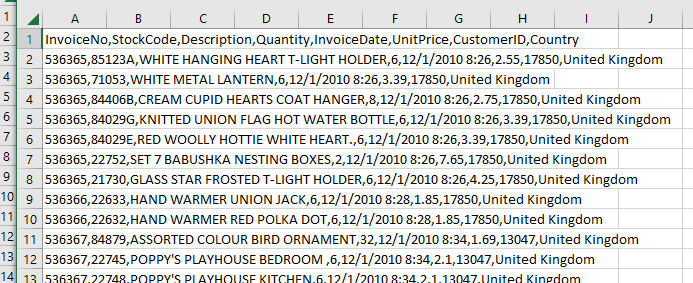

У нас же столбцы с названиями переменных и данные никак не разделены:

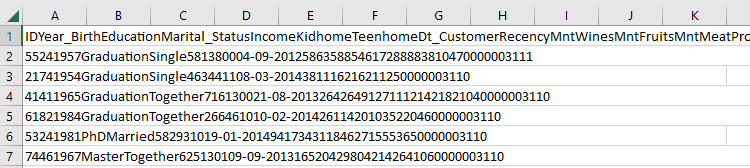

Поэтому считываем, используя параметр delimeter:

In [560]:
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/marketing_campaign.csv', sep = "\t")


# Обзор данных

In [561]:
data.shape

(2240, 29)

In [562]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [564]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

По умолчанию, метод `describe()` пропускает строки и столбцы не содержащие чисел - категориальные признаки. Включим сводку по всем столбцам, добавив аргумент `include = "all"`:


In [565]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [566]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [567]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

ID
False    2240
Name: ID, dtype: int64
 
Year_Birth
False    2240
Name: Year_Birth, dtype: int64
 
Education
False    2240
Name: Education, dtype: int64
 
Marital_Status
False    2240
Name: Marital_Status, dtype: int64
 
Income
False    2216
True       24
Name: Income, dtype: int64
 
Kidhome
False    2240
Name: Kidhome, dtype: int64
 
Teenhome
False    2240
Name: Teenhome, dtype: int64
 
Dt_Customer
False    2240
Name: Dt_Customer, dtype: int64
 
Recency
False    2240
Name: Recency, dtype: int64
 
MntWines
False    2240
Name: MntWines, dtype: int64
 
MntFruits
False    2240
Name: MntFruits, dtype: int64
 
MntMeatProducts
False    2240
Name: MntMeatProducts, dtype: int64
 
MntFishProducts
False    2240
Name: MntFishProducts, dtype: int64
 
MntSweetProducts
False    2240
Name: MntSweetProducts, dtype: int64
 
MntGoldProds
False    2240
Name: MntGoldProds, dtype: int64
 
NumDealsPurchases
False    2240
Name: NumDealsPurchases, dtype: int64
 
NumWebPurchases
False    2240
Name: NumWebPurc

Есть ли дубликаты:

In [568]:
data.duplicated().sum()

0

# EDA + Визуализация данных

Посмотрим, сколько человек приняли участие в последнем мероприятии:

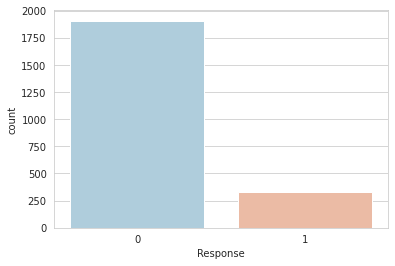

In [569]:
sns.set_style('whitegrid')
sns.countplot(x='Response',data=data,palette='RdBu_r')

Их процентное соотношение:

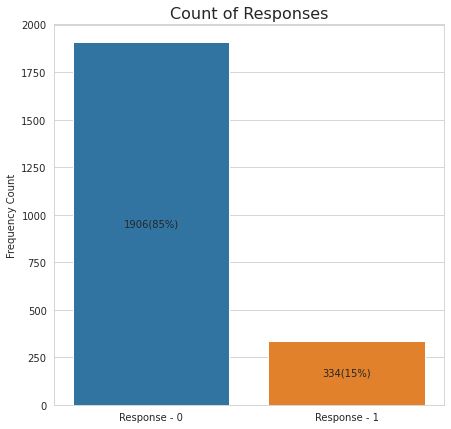

In [570]:
figure, response_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= data["Response"].value_counts().index, y = data["Response"].value_counts(), ax = response_bar)
response_bar.set_xticklabels(['Response - 0', 'Response - 1'])
response_bar.set_ylabel('Frequency Count')
response_bar.set_title('Count of Responses', fontsize = 16)

for patch in response_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  
    label_y = patch.get_y() + patch.get_height()/2
    response_bar.text(label_x, label_y,
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(data.Response))+')',
               horizontalalignment='center', verticalalignment='center')

Процентное соотношение параметров `AcceptedCmp1`, `Marital_Status`, `Kidhome`,`Teenhome`, `Complain`, `Education`

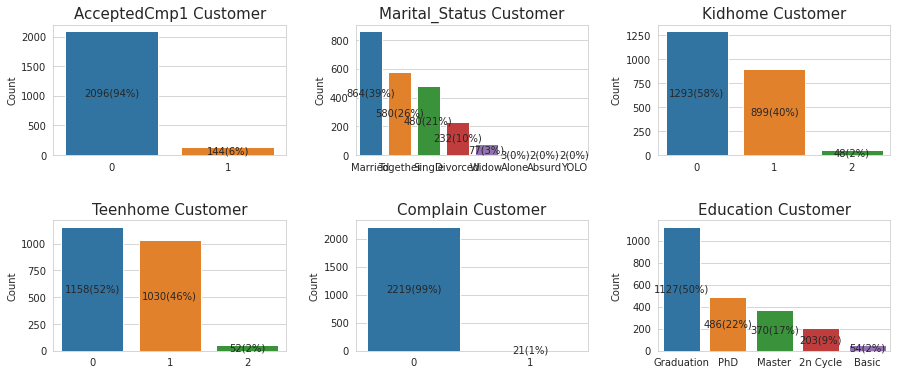

In [571]:
fig, myplot = plt.subplots(figsize = (15,6), nrows = 2,ncols = 3)

features = ["AcceptedCmp1","Marital_Status","Kidhome","Teenhome","Complain","Education"]

row, col, num_cols = 0,0,3

for u in features:
    sns.barplot(x = data[u].value_counts().index,y = data[u].value_counts(),
                ax  = myplot[row, col])
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u + " Customer", fontsize = 15)
    myplot[row, col].set_ylabel("Count")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)

for v in range(2):
    for z in range(3):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2 
            label_y = patch.get_y() + patch.get_height()/2
            myplot[v,z].text(label_x, label_y, 
                             str(int(patch.get_height())) + '('+'{:.0%}'.format(
                               patch.get_height()/len(data.ID))+')',
                            horizontalalignment='center', verticalalignment='center')

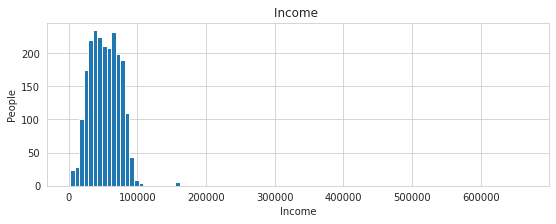

In [572]:
plt.figure(figsize = (9,3))
plt.hist(data["Income"], bins = 100)
plt.xlabel("Income")
plt.ylabel("People")
plt.title("{} ".format("Income"))
plt.show()

Как мы видим на графике выше, большая часть людей в нашем наборе данных имеет годовой доход от 0 до 100 000 долларов, меньшая часть - около 150 000 долларов, а некоторые имеют доход около 700 000 долларов. В следующих разделах мы получим более чистые графики после исключения выбросов из нашего набора.

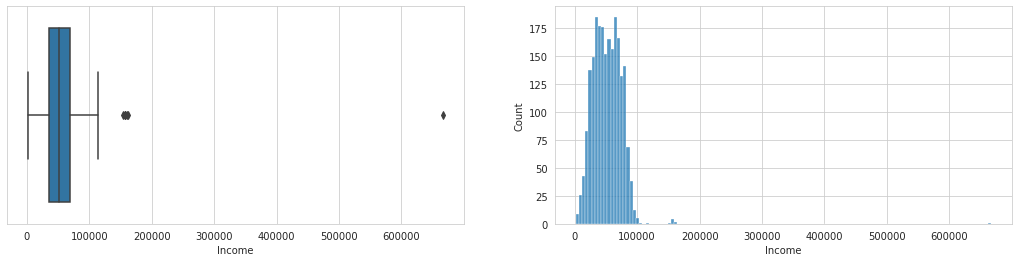

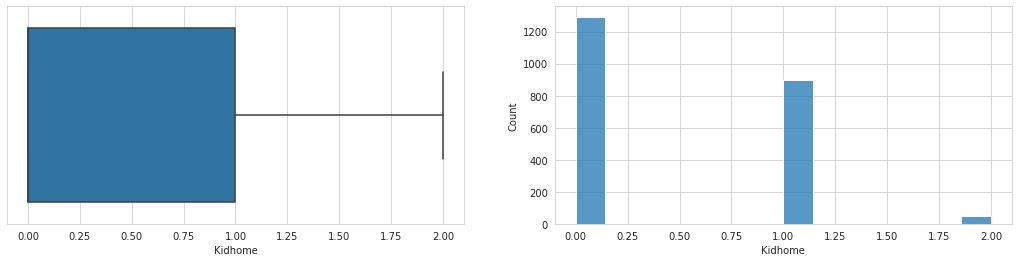

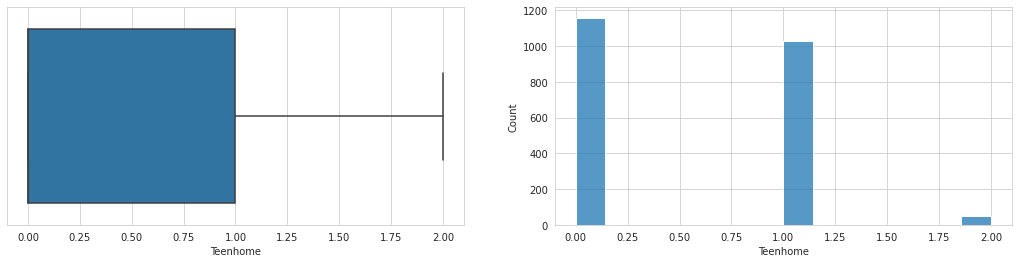

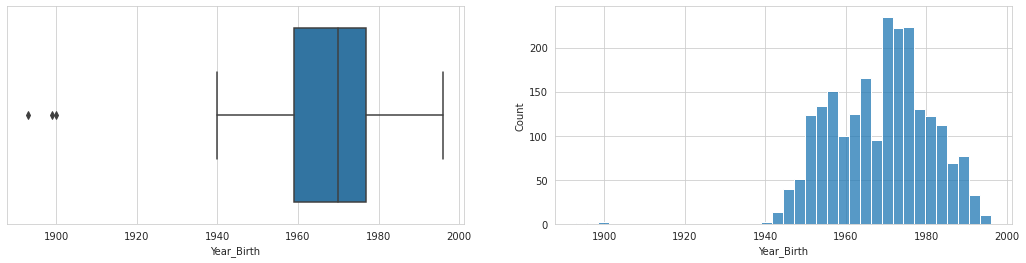

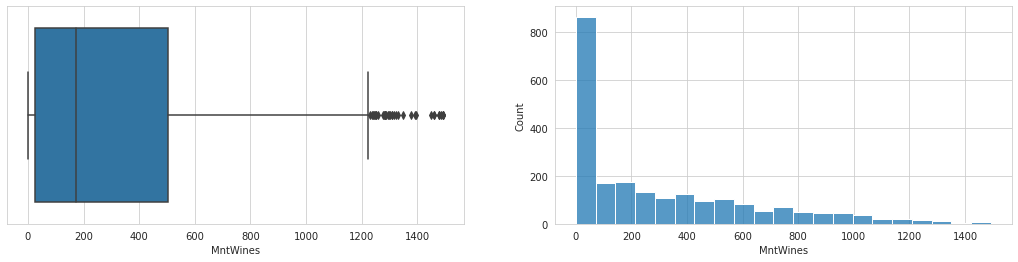

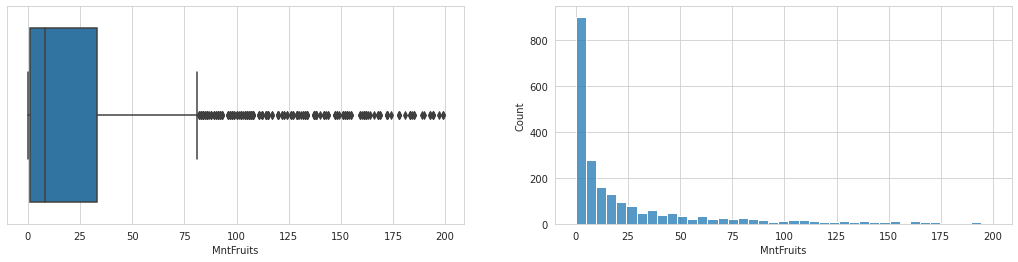

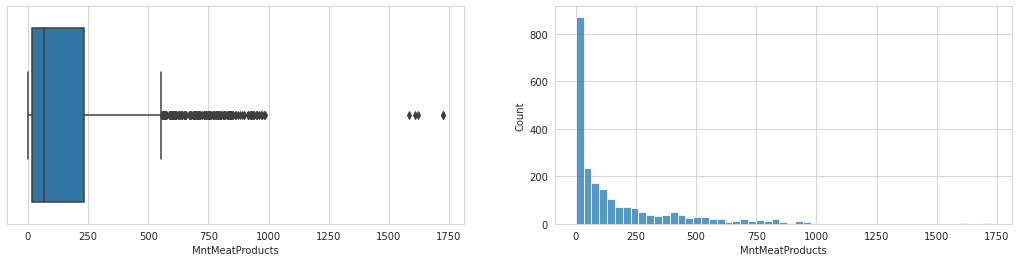

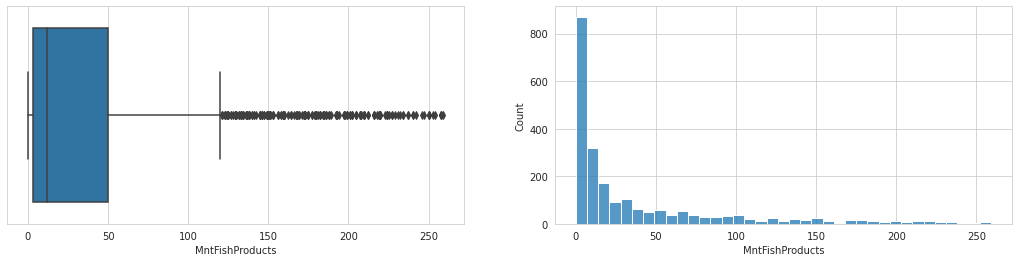

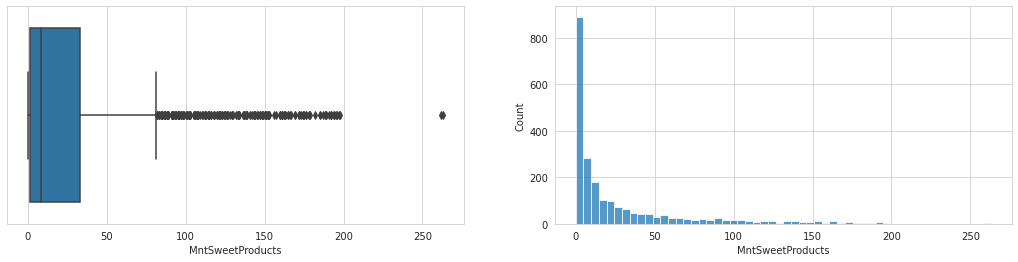

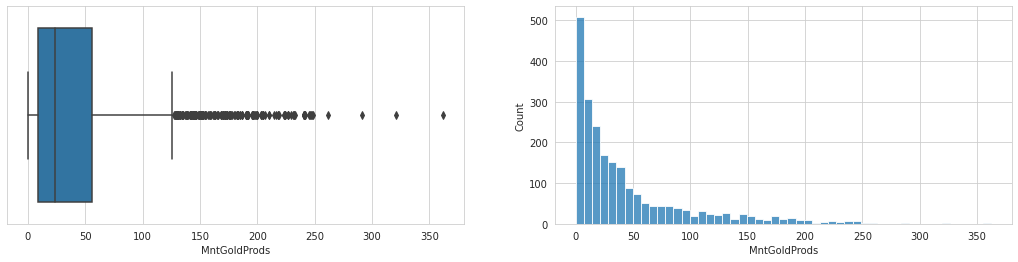

In [573]:
cont_col=['Income','Kidhome', 'Teenhome','Year_Birth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
for i in cont_col:
    plt.figure(figsize=(18,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=data[i],data=data)
    plt.subplot(1,2,2)
    sns.histplot(x=data[i],data=data)
    plt.show()

Проанализировав диаграммы выше можно увидеть, что у нас есть выбросы в столбце `Income`, `Year_Birth`

**Выводы:**
- Средний доход: 51961.9
- Средний возраст покупателя: 45 лет
- 75% покупателей имеет 1 ребёнка до 13 лет и 1 подростка 
- В среднем каждый тратит 304.127460 на вино
- Самая дорогая покупка из всех категорий - мясо: 1725.0 фунтов

# Улучшение данных

## Работа с пустыми значениями

In [574]:
data.groupby(data['Income'].isnull()).mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Income,,,,,,,,,,,,,,,,,,,,,
False,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
True,5943.625000,1967.458333,NaN,0.666667,0.583333,58.041667,197.208333,21.333333,162.708333,27.166667,...,5.083333,0.000000,0.125000,0.041667,0.083333,0.000000,0.000000,3.0,11.0,0.041667


В блоке выше мы обнаружили, что у нас есть 24 строки с пустым значением `Income`. 24 строки - не так много, по сравнению с общим количеством строк (2240), но всё же для более точного предсказания заполним их средними значениями, чтобы не терять в качестве обучения. `Income` имеет тип `float64` поэтому заполнить его будет не так сложно:


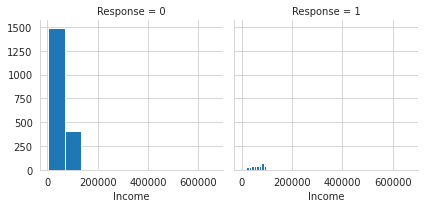

In [575]:
data["Income"].fillna(data["Income"].mean(), inplace = True)

sns.set_style('whitegrid')
%matplotlib inline

g = sns.FacetGrid(data, col="Response")
g.map(plt.hist, "Income", bins=10)

Убедимся, что пустых данных не осталось:

In [576]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Исключение неподходящих данных

Исключим людей старше 85 и моложе 18 лет из набора, поскольку они не входят в нашу целевую клиентскую базу. Кроме того, исключим людей с доходом более 200 000 долларов из нашего набора.

In [577]:
data = data.drop(data[data.Income > 200000].index)
data = data.drop(data[data.Year_Birth < 1935].index)
data = data.drop(data[data.Year_Birth > 2004].index)

## Преобразование данных
1. Столбец `Marital_Status` содержит 8 категорий, некоторые из которых не имеют отношения к анализу. Поэтому заменим `Absurd`, `Alone`, `YOLO` на `Single`:

In [578]:
data['Marital_Status']=data['Marital_Status'].replace(['Absurd','Alone','YOLO'],['Single','Single','Single'])

2. Столбец `Year_Birth` также не имеет отношения к анализу, можем использовать возраст вместо `Year_Birth`. Поскольку последняя операция была  в 2014 году, мы рассчитываем возраст клиента до 2014 года.

In [579]:
data['age']=2014-data['Year_Birth']

Удалим несущественные переменные:

In [580]:
# data.drop(['ID', 'Dt_Customer'],axis=1,inplace=True)
data.drop(['Dt_Customer'],axis=1,inplace=True)

## Обнаружение выбросов и их удаление
Выбросы являются одним из основных проблем, мешающих делать корректные выводы из набора и правильно обучать алгоритм ML.

Определим выбросы:

In [581]:
from collections import Counter

def detect_outliers(data,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [582]:
data.loc[detect_outliers(data,["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
164,8475,1973,PhD,Married,157243.000000,0,1,98,20,2,...,0,0,0,0,0,0,3,11,0,41
687,1501,1982,PhD,Married,160803.000000,0,0,21,55,16,...,0,0,0,0,0,0,3,11,0,32
1653,4931,1977,Graduation,Together,157146.000000,0,0,13,1,0,...,0,0,0,0,0,0,3,11,0,37
987,4580,1969,Graduation,Married,75759.000000,0,0,46,1394,22,...,1,0,1,1,0,0,3,11,1,45
1010,5236,1979,Graduation,Together,77568.000000,0,1,30,1230,0,...,0,1,1,1,0,0,3,11,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2429,1954,Graduation,Divorced,72071.000000,0,1,4,531,69,...,0,0,0,0,0,0,3,11,0,60
2175,1772,1975,PhD,Married,79174.000000,0,0,2,1074,37,...,0,0,1,1,0,0,3,11,1,39
27,5255,1986,Graduation,Single,52247.251354,1,0,19,5,1,...,0,0,0,0,0,0,3,11,0,28
287,8148,1956,Master,Together,50898.000000,1,1,88,285,28,...,0,0,0,0,0,0,3,11,0,58


У нас около 149 выбросов, поэтому,удалим эти выбросы непосредственно из нашего набора данных.

In [583]:
data = data.drop(detect_outliers(data,["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]),axis = 0).reset_index(drop = True)

In [584]:
data[['Income','Year_Birth','Kidhome', 'Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2087.0,50145.433891,20493.555875,1730.0,34445.0,49638.0,65507.0,162397.0
Year_Birth,2087.0,1968.868232,11.647153,1940.0,1959.0,1970.0,1977.0,1996.0
Kidhome,2087.0,0.471490,0.543441,0.0,0.0,0.0,1.0,2.0
Teenhome,2087.0,0.526593,0.545299,0.0,0.0,1.0,1.0,2.0
MntWines,2087.0,283.910398,328.230272,0.0,22.0,155.0,459.5,1493.0
MntFruits,2087.0,20.935314,32.587373,0.0,1.0,7.0,26.0,197.0
MntMeatProducts,2087.0,139.986104,191.637312,0.0,14.0,56.0,181.5,1607.0
MntFishProducts,2087.0,29.851461,44.830842,0.0,2.0,11.0,38.0,258.0
MntSweetProducts,2087.0,21.462865,33.724469,0.0,1.0,7.0,26.0,262.0
MntGoldProds,2087.0,38.994250,46.485680,0.0,8.0,22.0,49.0,321.0


# Machine Learning

In [585]:
cat_col = ["Education", "Marital_Status"]
cluster = data.copy()
cluster.drop(['Year_Birth'], axis=1, inplace=True)

Сконвертируем категориальные переменные в числовые коды:

In [586]:
for i in cat_col:
    cluster[i] = cluster[i].astype('category')
    cluster[i] = cluster[i].cat.codes
cluster.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,2174,2,2,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,60
1,4141,2,3,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,49
2,6182,2,3,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,30
3,5324,4,1,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,33
4,7446,3,3,62513.0,0,1,16,520,42,98,...,0,0,0,0,0,0,3,11,0,47


In [587]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2087 non-null   int64  
 1   Education            2087 non-null   int8   
 2   Marital_Status       2087 non-null   int8   
 3   Income               2087 non-null   float64
 4   Kidhome              2087 non-null   int64  
 5   Teenhome             2087 non-null   int64  
 6   Recency              2087 non-null   int64  
 7   MntWines             2087 non-null   int64  
 8   MntFruits            2087 non-null   int64  
 9   MntMeatProducts      2087 non-null   int64  
 10  MntFishProducts      2087 non-null   int64  
 11  MntSweetProducts     2087 non-null   int64  
 12  MntGoldProds         2087 non-null   int64  
 13  NumDealsPurchases    2087 non-null   int64  
 14  NumWebPurchases      2087 non-null   int64  
 15  NumCatalogPurchases  2087 non-null   i

Стандартизация набора данных является общим требованием для машинного обучения: данные содержат в совокупности признаки разного размера и масштаба. Различные масштабы функций данных отрицательно влияют на моделирование набора данных.

Обучение может сработать не совсем корректно, если некоторые поля не похожи на стандартные нормально распределенные данные

In [588]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(cluster),columns=cluster.columns)

Для использования `KMeans` нам нужно указать количество кластеров. Чтобы высчитать необходимое количество, воспользуемся:
- суммой квадратов ошибок
- метод силуэта

Сумма квадратов ошибок:


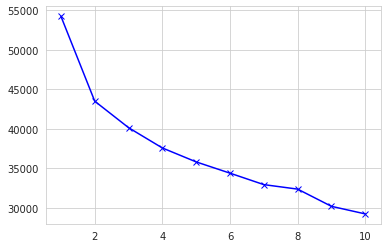

In [589]:
sse={}
for k in range(1,11):
    kmean=KMeans(n_clusters=k,random_state=1).fit(data_scaled)
    lables=kmean.predict(data_scaled)
    sse[k]=kmean.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlable='no. of clusters'
plt.ylable= 'SSE'
plt.show()

Исходя из графика, наиболее подходящее количество кластеров - 2.
Проверим методом силуэта:

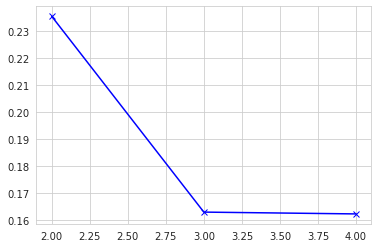

In [590]:
sc={}
for k in range(2,5):
    km=KMeans(n_clusters=k,random_state=1).fit(data_scaled)
    l=km.predict(data_scaled)
    sc[k]=silhouette_score(data_scaled,l)
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlable='no. of clusters'
plt.ylable= 'SSE'
plt.show()

Лучшее количество кластеров для обучения - 2

In [591]:
kmeans=KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_scaled)

cluster['cluster_no']=kmeans.predict(data_scaled) 

data['cluster']=kmeans.predict(data_scaled)

В набор добавлена колонка для предсказания кластера `cluster_no` и `cluster` соответственно

In [592]:
data.cluster.value_counts()

0    1282
1     805
Name: cluster, dtype: int64

# Кластеризация (KMeans)


In [593]:
means=data.groupby('cluster').mean()

In [594]:
df_mean=pd.DataFrame(means)
df_mean.index=['cluster1','cluster2']
df_mean.T

,cluster1,cluster2
ID,5604.532761,5581.801242
Year_Birth,1970.370515,1966.475776
Income,38133.734806,69274.624234
Kidhome,0.719189,0.077019
Teenhome,0.544462,0.498137
Recency,48.905616,49.337888
MntWines,90.580343,591.797516
MntFruits,5.932917,44.827329
MntMeatProducts,34.368955,308.186335
MntFishProducts,8.825273,63.336646


In [595]:
cluster1=data.loc[data.cluster==0]
cluster2=data.loc[data.cluster==1]
cluster1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,cluster
0,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,3,11,0,60,0
2,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,3,11,0,30,0
3,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,3,11,0,33,0
6,6177,1985,PhD,Married,33454.0,1,0,32,76,10,...,0,0,0,0,0,3,11,0,29,0
7,4855,1974,PhD,Together,30351.0,1,0,19,14,0,...,0,0,0,0,0,3,11,1,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,7004,1984,Graduation,Single,11012.0,1,0,82,24,3,...,0,0,0,0,0,3,11,0,30,0
2080,8080,1986,Graduation,Single,26816.0,0,0,50,5,1,...,0,0,0,0,0,3,11,0,28,0
2081,8372,1974,Graduation,Married,34421.0,1,0,81,3,3,...,0,0,0,0,0,3,11,0,40,0
2083,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,0,1,0,0,3,11,0,68,0


Graduation    630
PhD           253
Master        226
2n Cycle      120
Basic          53
Name: Education, dtype: int64
Graduation    403
PhD           217
Master        125
2n Cycle       60
Name: Education, dtype: int64


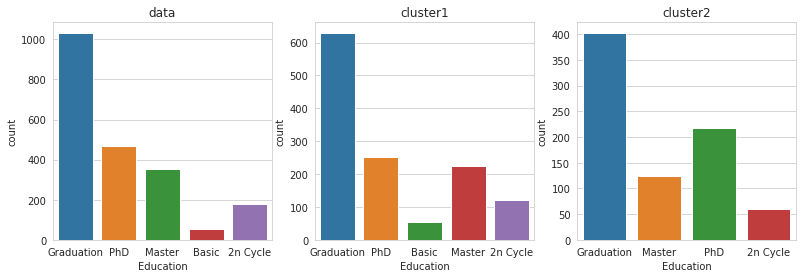

Married     500
Together    338
Single      285
Divorced    125
Widow        34
Name: Marital_Status, dtype: int64
Married     312
Together    200
Single      170
Divorced     90
Widow        33
Name: Marital_Status, dtype: int64


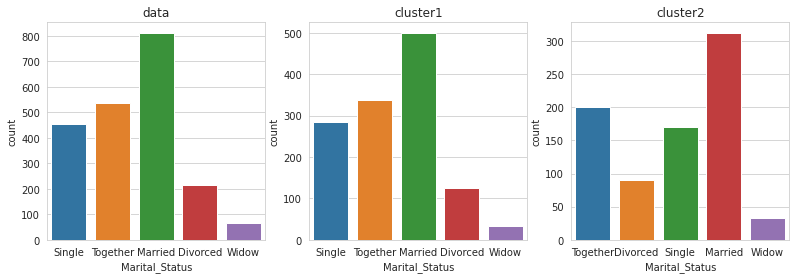

In [596]:
for i in cat_col:
    print(cluster1[i].value_counts())
    print(cluster2[i].value_counts())
    plt.figure(figsize=(18,4))
    plt.subplot(1,4,1)
    plt.title("data")
    sns.countplot(x=data[i],data=data)
    plt.subplot(1,4,2)
    plt.title("cluster1")
    sns.countplot(x=cluster1[i],data=cluster1)
    plt.subplot(1,4,3)
    plt.title("cluster2")
    sns.countplot(x=cluster2[i],data=cluster2)
    #plt.subplot(1,4,4)
    #plt.title("cluster3")
    #sns.countplot(x=cluster3[i],data=cluster3)
    plt.show()

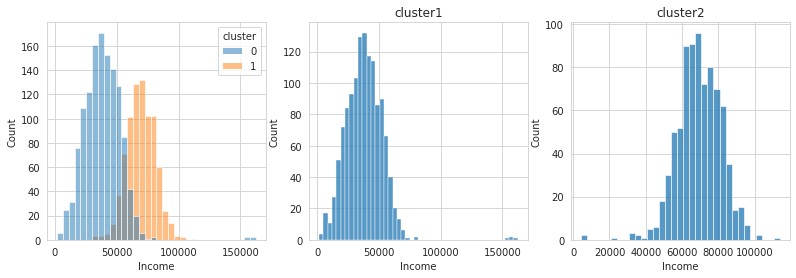

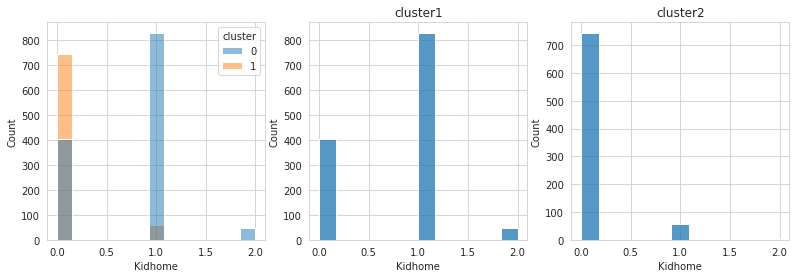

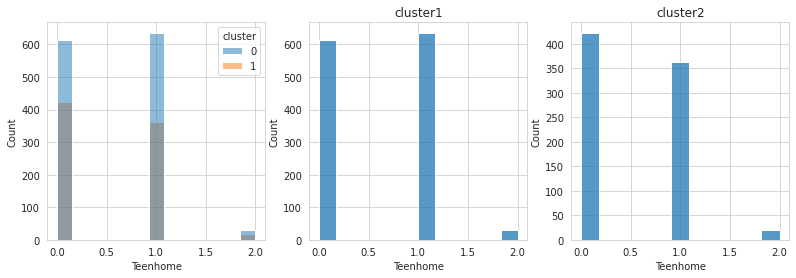

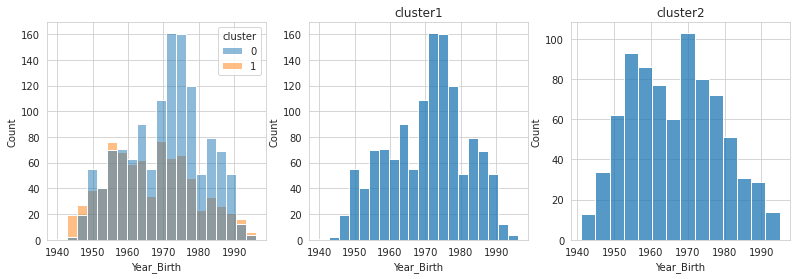

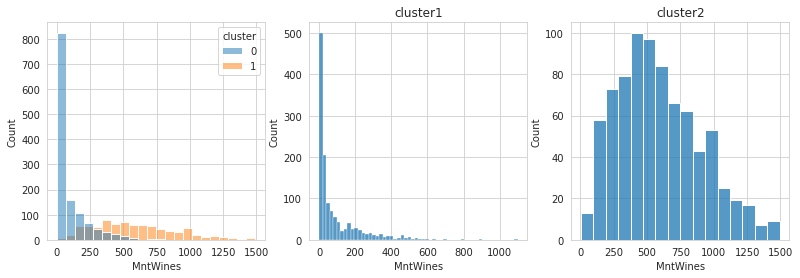

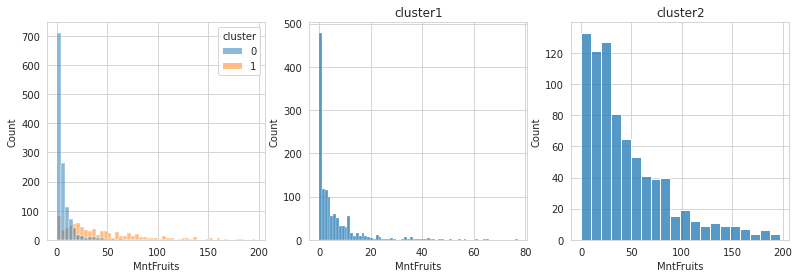

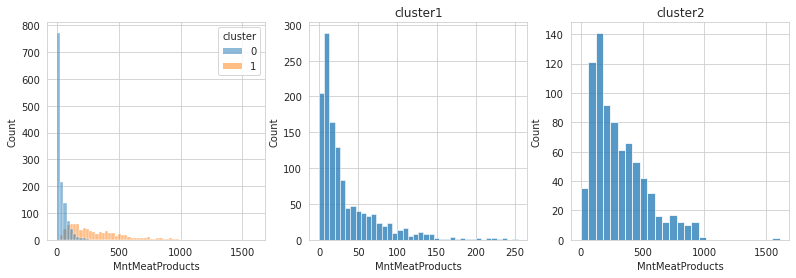

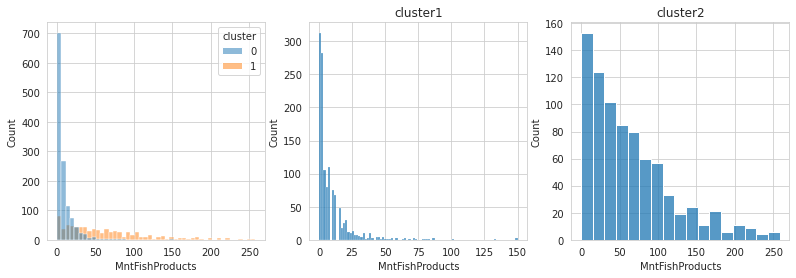

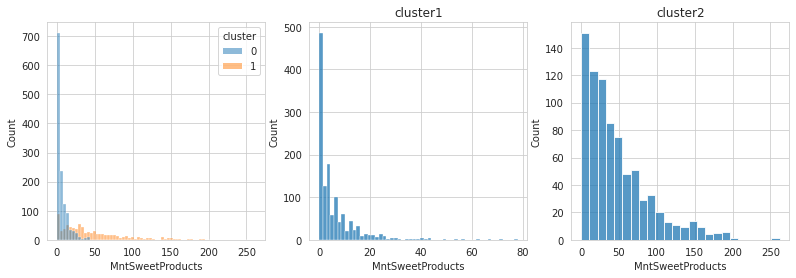

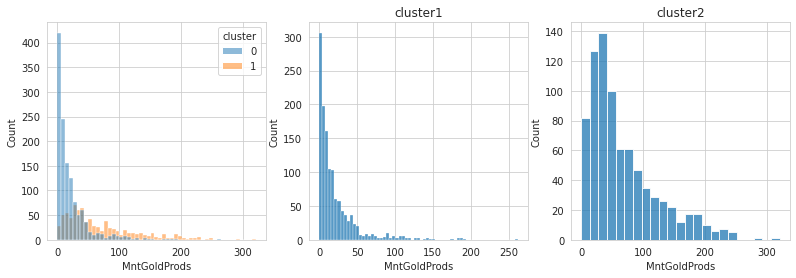

In [597]:
for i in cont_col:
    plt.figure(figsize=(18,4))
    plt.subplot(1,4,1)
    sns.histplot(x=data[i],data=data,hue='cluster')
    plt.subplot(1,4,2)
    plt.title("cluster1")
    sns.histplot(x=cluster1[i],data=cluster1)
    plt.subplot(1,4,3)
    plt.title("cluster2")
    sns.histplot(x=cluster2[i],data=cluster2)
    plt.show()

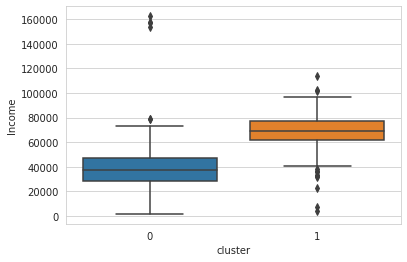

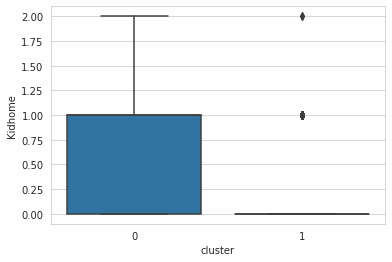

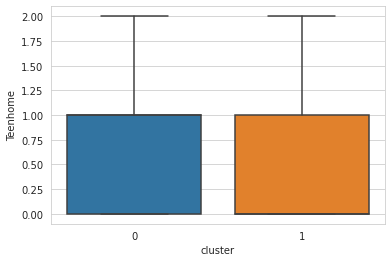

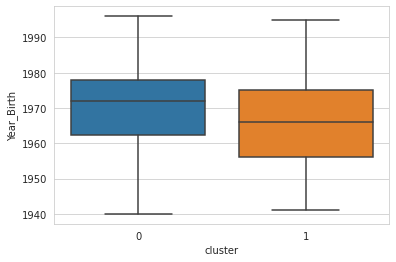

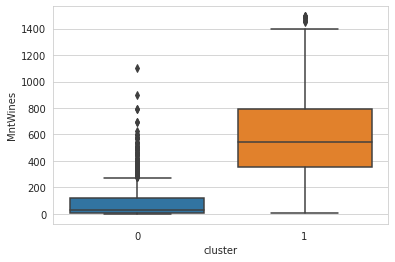

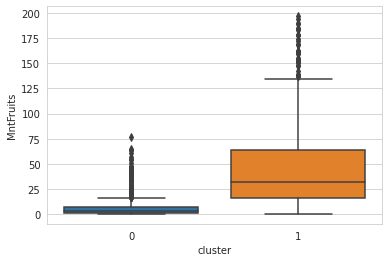

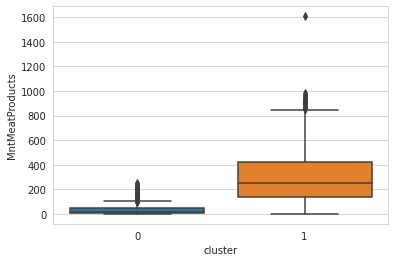

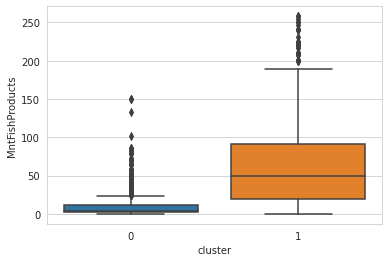

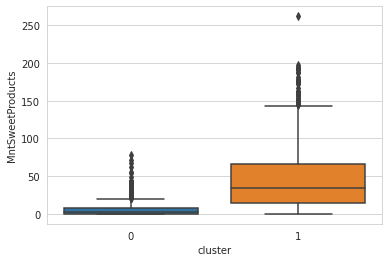

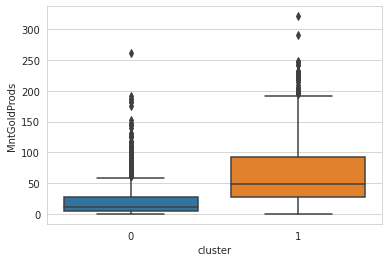

In [598]:
for i in cont_col:
    sns.boxplot(x='cluster', y=i, data=data)
    plt.show()

In [599]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True)
pca.fit(cluster)
data_pca = pca.transform(cluster)

In [600]:
clusters = kmeans.fit_predict(data_pca)

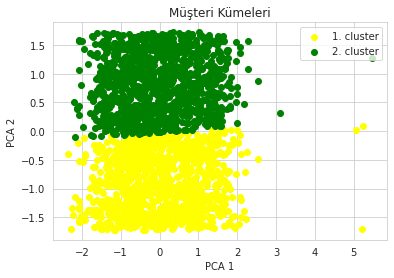

In [601]:
plt.scatter(data_pca[clusters == 0, 0], data_pca[clusters == 0, 1], c = 'yellow', label = '1. cluster')
plt.scatter(data_pca[clusters == 1, 0], data_pca[clusters == 1, 1], c = 'green', label = '2. cluster')
plt.title('Müşteri Kümeleri')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# RFM
 RFM-анализ — это способ сегментации. Сегментами называются непересекающиеся группы потребителей. RFM-анализ предлагает для каждого покупателя выделить три признака:

- R (Recency) — насколько давно клиент сделал последний заказ.
- F (Frequency) — сколько всего заказов сделал клиент.
- M (Monetary) — сколько денег клиент потратил.

Атрибут `Frequency` - сумма количества покупок по всем переменным: `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`:

In [602]:
dataOrig = data.copy()
data = data[data['ID'] < 2000]
data2 = dataOrig[dataOrig['ID'] >= 2000]

In [603]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,cluster
5,965,1971,Graduation,Divorced,55635.000000,0,1,34,235,65,...,0,0,0,0,0,3,11,0,43,1
9,1994,1983,Graduation,Married,52247.251354,1,0,11,5,5,...,0,0,0,0,0,3,11,0,31,0
10,387,1976,Basic,Married,7500.000000,0,0,59,6,16,...,0,0,0,0,0,3,11,0,38,0
20,1993,1949,PhD,Married,58607.000000,0,1,63,867,0,...,1,0,0,0,0,3,11,0,65,1
22,1409,1951,Graduation,Together,40689.000000,0,1,69,270,3,...,0,0,0,0,0,3,11,0,63,0


In [604]:
data['Frequency'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

<ipython-input-604-1a113404ee29>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



`Monetary` формируется из общей суммы затрат на все продукты:

In [605]:
data['Monetary'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

<ipython-input-605-c75b4bca8f11>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [606]:
df_rfm = data[['Recency','Frequency','Monetary']]
df_rfm.describe()

,Recency,Frequency,Monetary
count,365.000000,365.000000,365.000000
mean,48.846575,11.890411,534.413699
std,29.166979,6.684741,550.738492
min,0.000000,1.000000,11.000000
25%,25.000000,6.000000,73.000000
50%,49.000000,11.000000,315.000000
75%,74.000000,17.000000,884.000000
max,99.000000,28.000000,2231.000000


In [607]:
# Установка цветов для rfm
colors_rfm = ['rgb(183, 9, 76)',  'rgb(92, 77, 125)', 'rgb(0, 145, 173)']

In [608]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px

#plotting rfm distribution before scaling
fig = px.box(pd.melt(df_rfm), x='variable', y='value',
             title='<b>RFM Data Distribution Before Scaling</b>',
             color='variable', color_discrete_sequence=colors_rfm,
             boxmode='overlay', points='all')

fig.update_layout(showlegend=False,paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22)

fig.show()

In [609]:
std = StandardScaler()
df_rfm_scaled = pd.DataFrame(std.fit_transform(df_rfm), columns=df_rfm.columns)

In [610]:
fig = px.box(pd.melt(df_rfm_scaled), x='variable', y='value',
             title='<b>RFM Data Distribution After Scaling</b>',
             color='variable', color_discrete_sequence=colors_rfm,
             boxmode='overlay', points='all')

fig.update_layout(showlegend=False,paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22)

fig.show()

Scoring

In [611]:
df_rfm["Recency_Score"]=pd.qcut(df_rfm["Recency"],4,labels=[4,3,2,1,])
df_rfm["Frequency_Score"]=pd.qcut(df_rfm["Frequency"].rank(method="first"),4,labels=[1,2,3,4])
df_rfm["Monetary_Score"]=pd.qcut(df_rfm["Monetary"],4,labels=[1,2,3,4])

#(ref+fre+mon)/3
df_rfm["RFM_Score"]=(df_rfm["Recency_Score"].astype(int)+df_rfm["Frequency_Score"].astype(int)+df_rfm["Monetary_Score"].astype(int))/3
df_rfm=df_rfm.sort_values("RFM_Score",ascending=False)
df_rfm.head()

<ipython-input-611-aa8e61c69a06>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-611-aa8e61c69a06>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-611-aa8e61c69a06>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-611-aa8

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
738,17,23,1071,4,4,4,4.0
348,14,18,1377,4,4,4,4.0
1749,8,24,1039,4,4,4,4.0
1588,25,28,1220,4,4,4,4.0
123,21,22,1482,4,4,4,4.0


In [613]:
data2.nunique()
data2['Total_Cost'] = data2['MntWines'] + data2['MntFruits'] + data2['MntMeatProducts'] + data2['MntFishProducts'] + data2['MntSweetProducts'] + data2['MntGoldProds']
monetary_df2 = data2.groupby(by='CustomerID', as_index=False).agg({'Total_Cost': 'sum'})
monetary_df2.columns = ['CustomerID', 'LaterSum']
monetary_df2 = monetary_df2.query('LaterSum>0')
monetary_df2

In [ ]:
rfm_res = df_rfm.merge(monetary_df2, on='CustomerID', how='left')
rfm_res['Target'] = rfm_res['LaterSum'].apply(lambda x: int(not(math.isnan(x))))
rfm_res